# Perkenalan

Nama : Muhammad Fauzan

Graded Challenge 2

Phase 1

## Tentang Dataset

Dataset yang digunakan [disini](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)


Sex :
> Female = 0 , Male = 1

Diabetes :
> 0 = No , 1 = Yes

Anaemia :
> 0 = No , 1 = Yes

High_blood_pressure :
> 0 = No , 1 = Yes

Smoking :
> 0 = No , 1 = Yes

DEATH_EVENT :
> 0 = No , 1 = Yes

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Objektif

*   Mampu memahami konsep Classification dengan Ensemble Model
*   Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
*   Mampu mengimplementasikan Ensemble Model untuk membuat prediksi



# Import Pustaka

In [ ]:
# import pustaka
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

# Data Loading

Import dataset terlebih dahulu agar dapat diolah.

In [ ]:
# import dataset
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

Kemudian, lihat 10 data teratas, 10 data terbawah, dan kolom apa saja di dalam dataset.

In [ ]:
# 10 data teratas
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
# 10 data terbawah
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
# cek kolom
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Data Cleaning

Cek tipe data dan jumlah data dari dataset.

In [ ]:
# cek info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Kemudian, cek missing values dari dataset.

In [ ]:
# cek missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada missing values dari dataset.

Kemudian, cek apakah dataset memiliki outliers.

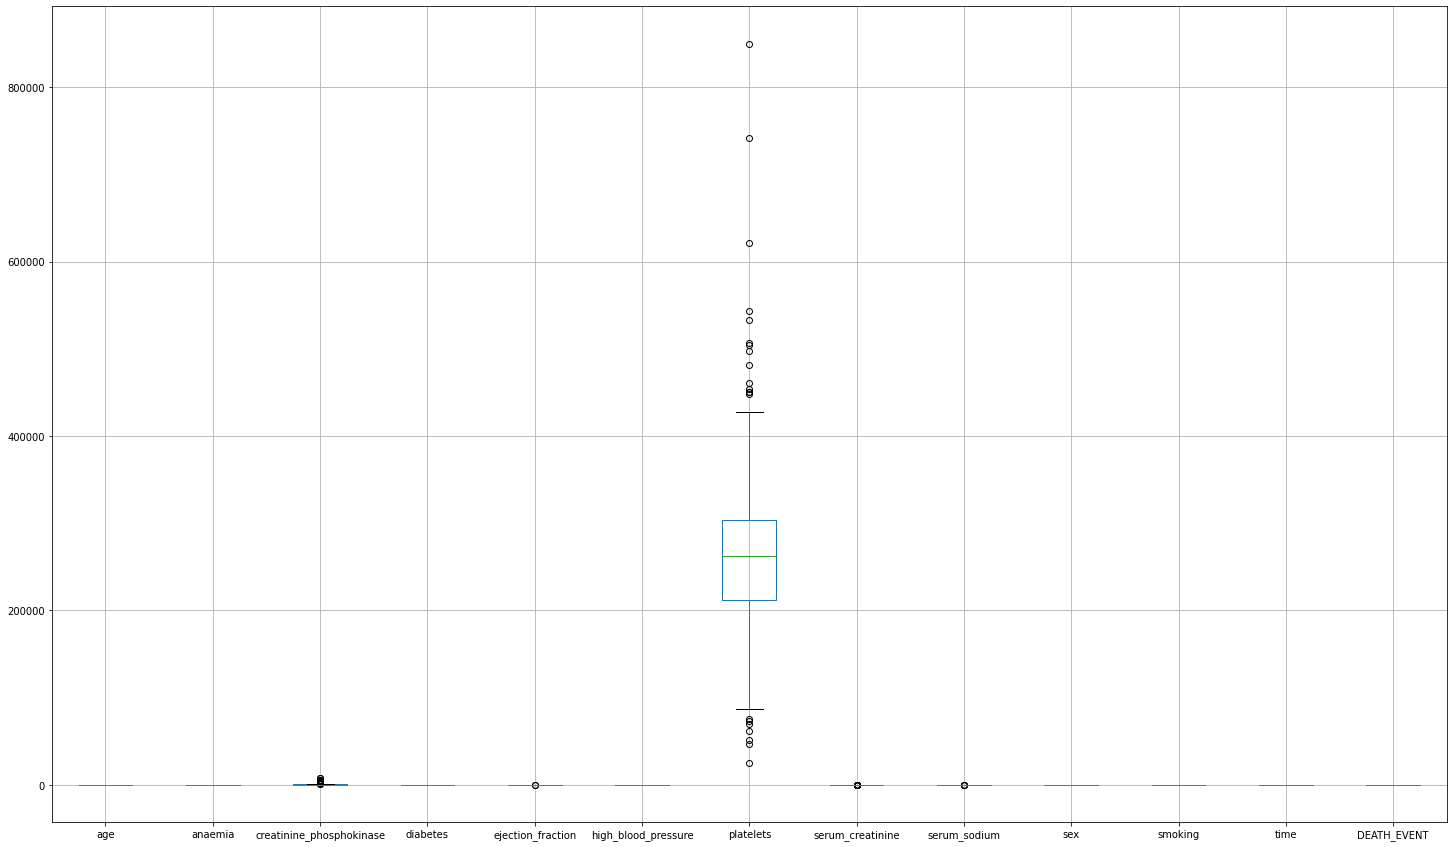

In [ ]:
# check outliers using boxplot
df.boxplot(figsize=(25,15))

Terlihat bahwa kolom yang memiliki outliers adalah 'platelets' dan 'creatinine_phosphokinase'

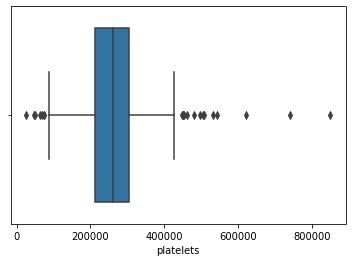

In [ ]:
# check platelets boxplot
sns.boxplot(df['platelets'])

In [ ]:
# hapus outliers dari platelets yang kurang dari 60000 dan yang lebih dari 480000
df = df[(df['platelets'] <= 480000) & (df['platelets'] >= 60000)]

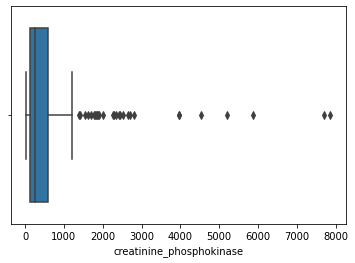

In [ ]:
# check creatinine_phosphokinase boxplot
sns.boxplot(df['creatinine_phosphokinase'])

In [ ]:
# hapus outliers dari creatinine_phosphokinase yang melebihi 2000
df = df[df['creatinine_phosphokinase'] <= 2000]

Kemudian, cek kembali boxplot dan juga info dari dataset.

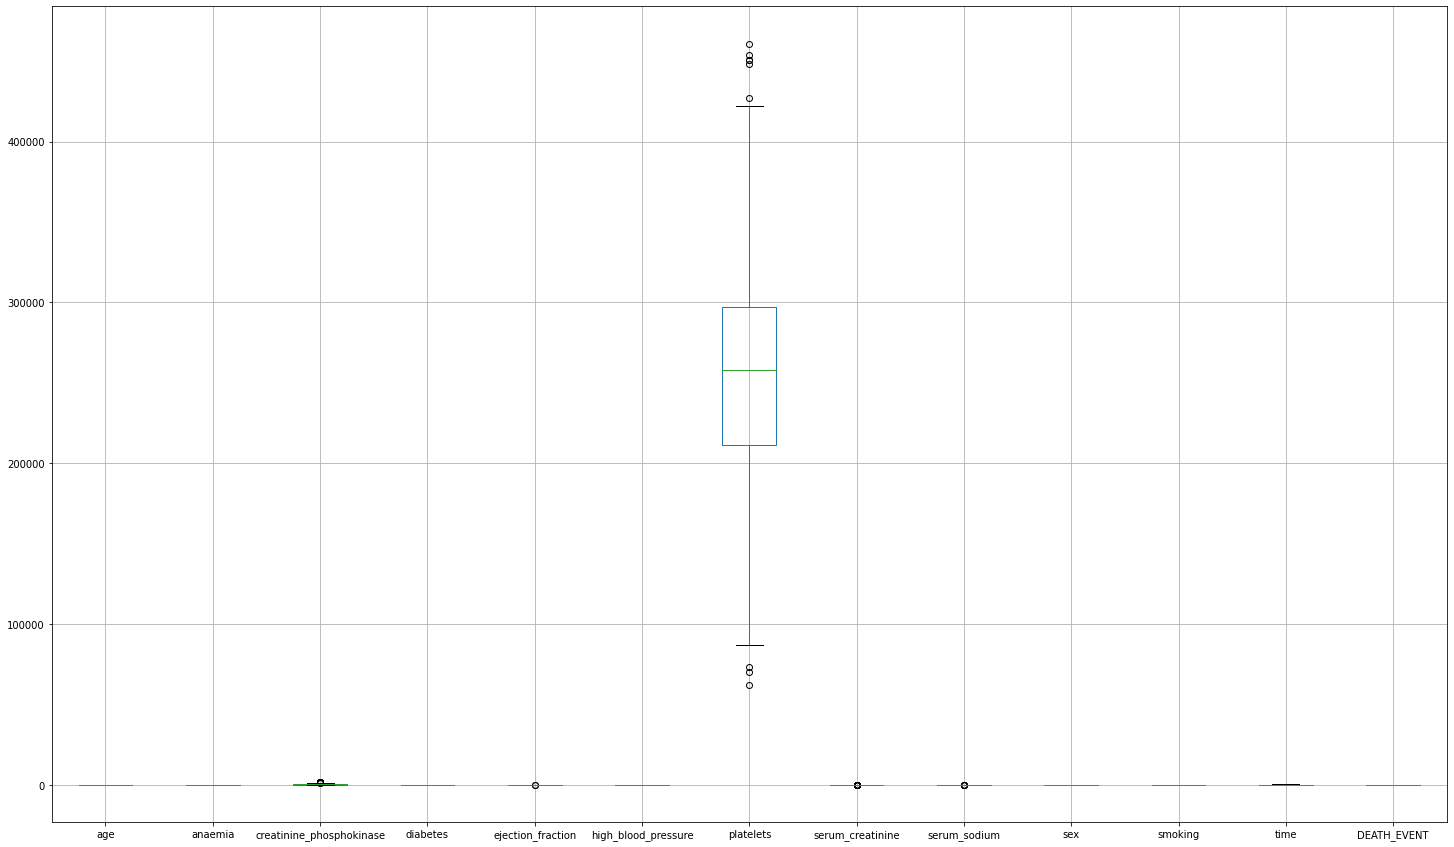

In [ ]:
# check boxplot
df.boxplot(figsize=(25,15))

In [ ]:
# cek info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       270 non-null    float64
 1   anaemia                   270 non-null    int64  
 2   creatinine_phosphokinase  270 non-null    int64  
 3   diabetes                  270 non-null    int64  
 4   ejection_fraction         270 non-null    int64  
 5   high_blood_pressure       270 non-null    int64  
 6   platelets                 270 non-null    float64
 7   serum_creatinine          270 non-null    float64
 8   serum_sodium              270 non-null    int64  
 9   sex                       270 non-null    int64  
 10  smoking                   270 non-null    int64  
 11  time                      270 non-null    int64  
 12  DEATH_EVENT               270 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 29.5 KB


# Data Exploration

Kita akan melihat persentase pasien yang hidup dan meninggal berdasarkan jenis kelamin.

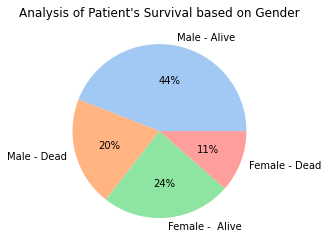

In [ ]:
# analysis of patient's survival based on Gender

male = df[df["sex"] == 1]
female = df[df["sex"] == 0]

## define the survival of male
male_alive = male[df["DEATH_EVENT"] == 0]
male_dead = male[df["DEATH_EVENT"] == 1]

## define the survival of female
female_alive = female[df["DEATH_EVENT"] == 0]
female_dead = female[df["DEATH_EVENT"] == 1]

## labels
labels = ['Male - Alive','Male - Dead', "Female -  Alive", "Female - Dead"]

## values
values = [len(male[df["DEATH_EVENT"]==0]),
          len(male[df["DEATH_EVENT"]==1]),
          len(female[df["DEATH_EVENT"]==0]),
          len(female[df["DEATH_EVENT"]==1])
]

## colors
colors = sns.color_palette('pastel')[0:4]

## pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Analysis of Patient's Survival based on Gender")
plt.show()

Kita akan melihat persentase pasien yang hidup dan meninggal berdasarkan penyakit diabetes.

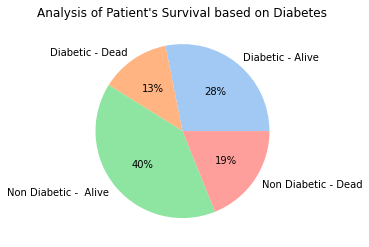

In [ ]:
# Analysis of Patient's survival based on Diabetes

diabet_yes = df[df['diabetes'] == 1]
diabet_no = df[df['diabetes'] == 0]

## define the survival of diabetic patient
diabet_yes_alive = diabet_yes[df["DEATH_EVENT"] == 0]
diabet_yes_dead = diabet_yes[df["DEATH_EVENT"] == 1]

## define the survival of non-diabetic patient
diabet_no_alive = diabet_no[df["DEATH_EVENT"] == 0]
diabet_no_dead = diabet_no[df["DEATH_EVENT"] == 1]

## labels
labels = ['Diabetic - Alive',
          'Diabetic - Dead', 
          'Non Diabetic -  Alive', 
          'Non Diabetic - Dead'
]

## values
values = [len(diabet_yes[df["DEATH_EVENT"]==0]),
          len(diabet_yes[df["DEATH_EVENT"]==1]),
          len(diabet_no[df["DEATH_EVENT"]==0]),
          len(diabet_no[df["DEATH_EVENT"]==1])
]

## colors
colors = sns.color_palette('pastel')[0:4]

## pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Analysis of Patient's Survival based on Diabetes")
plt.show()

Kita akan melihat persentase pasien yang hidup dan meninggal berdasarkan penyakit Anaemia.

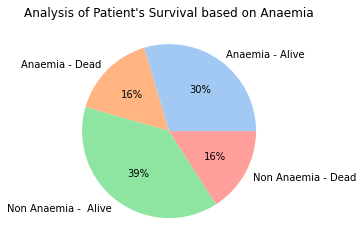

In [ ]:
# Analysis of Patient's survival based on Anaemia

anae_yes = df[df['anaemia'] == 1]
anae_no = df[df['anaemia'] == 0]

## define the survival of diabetic patient
anae_yes_alive = anae_yes[df["DEATH_EVENT"] == 0]
anae_yes_dead = anae_yes[df["DEATH_EVENT"] == 1]

## define the survival of non-diabetic patient
anae_no_alive = anae_no[df["DEATH_EVENT"] == 0]
anae_no_dead = anae_no[df["DEATH_EVENT"] == 1]

## labels
labels = ['Anaemia - Alive',
          'Anaemia - Dead', 
          'Non Anaemia -  Alive', 
          'Non Anaemia - Dead'
]

## values
values = [len(anae_yes[df["DEATH_EVENT"]==0]),
          len(anae_yes[df["DEATH_EVENT"]==1]),
          len(anae_no[df["DEATH_EVENT"]==0]),
          len(anae_no[df["DEATH_EVENT"]==1])
]

## colors
colors = sns.color_palette('pastel')[0:4]

## pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Analysis of Patient's Survival based on Anaemia")
plt.show()

Kita akan melihat persentase pasien yang hidup dan meninggal berdasarkan tekanan darah tinggi.

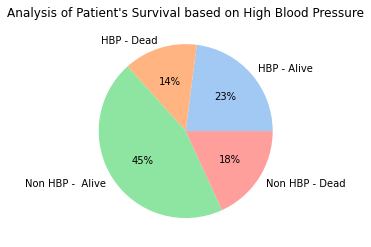

In [ ]:
# Analysis of Patient's survival based on Anaemia

hbp_yes = df[df['high_blood_pressure'] == 1]
hbp_no = df[df['high_blood_pressure'] == 0]

## define the survival of diabetic patient
hbp_yes_alive = hbp_yes[df["DEATH_EVENT"] == 0]
hbp_yes_dead = hbp_yes[df["DEATH_EVENT"] == 1]

## define the survival of non-diabetic patient
hbp_no_alive = hbp_no[df["DEATH_EVENT"] == 0]
hbp_no_dead = hbp_no[df["DEATH_EVENT"] == 1]

## labels
labels = ['HBP - Alive',
          'HBP - Dead', 
          'Non HBP -  Alive', 
          'Non HBP - Dead'
]

## values
values = [len(hbp_yes[df["DEATH_EVENT"]==0]),
          len(hbp_yes[df["DEATH_EVENT"]==1]),
          len(hbp_no[df["DEATH_EVENT"]==0]),
          len(hbp_no[df["DEATH_EVENT"]==1])
]

## colors
colors = sns.color_palette('pastel')[0:4]

## pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Analysis of Patient's Survival based on High Blood Pressure")
plt.show()

Kita akan melihat persentase pasien yang hidup dan meninggal berdasarkan kebiasaan merokok.

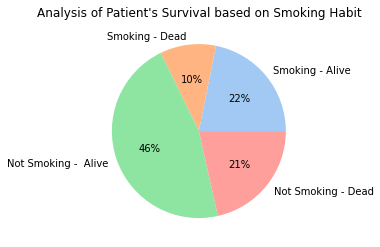

In [ ]:
# Analysis of Patient's survival based on Smoking Habit

smoke_yes = df[df['smoking'] == 1]
smoke_no = df[df['smoking'] == 0]

## define the survival of diabetic patient
smoke_yes_alive = smoke_yes[df["DEATH_EVENT"] == 0]
smoke_yes_dead = smoke_yes[df["DEATH_EVENT"] == 1]

## define the survival of non-diabetic patient
smoke_no_alive = smoke_no[df["DEATH_EVENT"] == 0]
smoke_no_dead = smoke_no[df["DEATH_EVENT"] == 1]

## labels
labels = ['Smoking - Alive',
          'Smoking - Dead', 
          'Not Smoking -  Alive', 
          'Not Smoking - Dead'
]

## values
values = [len(smoke_yes[df["DEATH_EVENT"]==0]),
          len(smoke_yes[df["DEATH_EVENT"]==1]),
          len(smoke_no[df["DEATH_EVENT"]==0]),
          len(smoke_no[df["DEATH_EVENT"]==1])
]

## colors
colors = sns.color_palette('pastel')[0:4]

## pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Analysis of Patient's Survival based on Smoking Habit")
plt.show()

# Data Preprocessing

Cek korelasi terhadap 'DEATH_EVENT' dari dataset.

In [ ]:
# korelasi terhadap RainTomorrow
corr_DE = df.corr()
corr_DE['DEATH_EVENT']

age                         0.279489
anaemia                     0.061011
creatinine_phosphokinase   -0.040658
diabetes                   -0.005745
ejection_fraction          -0.277243
high_blood_pressure         0.090180
platelets                  -0.041962
serum_creatinine            0.306729
serum_sodium               -0.211288
sex                        -0.007012
smoking                     0.004914
time                       -0.524900
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

Lihat korelasi yang bernilai positif lebih dari 0.2 dan yang bernilai kurang dari -0.2 (negatif)

In [ ]:
# korelasi positif >= 0.2
corr_DE['DEATH_EVENT'] >= 0.2

age                          True
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine             True
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                  True
Name: DEATH_EVENT, dtype: bool

In [ ]:
# korelasi negatif <= -0.2
corr_DE['DEATH_EVENT'] <= -0.2

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction            True
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                 True
sex                         False
smoking                     False
time                         True
DEATH_EVENT                 False
Name: DEATH_EVENT, dtype: bool

Buat dataframe baru yang nantinya akan diolah ke pemodelan ensembling berdasarkan kolom yang berkorelasi >= 0.2 dan <= -0.2

In [ ]:
# dataframe baru
df_new = df[['age', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'time', 'DEATH_EVENT']]

Kemudian, definisikan X dan y yang nantinya akan diproses untuk pelatihan model.

In [ ]:
# define X and y
X = df_new.drop('DEATH_EVENT', axis = 1)
y = df_new['DEATH_EVENT']

Split data menjadi train-dev-test dengan train test split

In [ ]:
# split data into train-dev-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 50, stratify= y)

In [ ]:
# lihat shape data yang sudah di split
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train shape (189, 5)
y_train shape (189,)
X_test shape (81, 5)
y_test.shape (81,)


# Pendefinisian Model

## Random Forest Classifier

In [ ]:
# random forest
rnd_cls = RandomForestClassifier(n_estimators=270,  
                                 max_leaf_nodes=8, 
                                 random_state=50
)
print(rnd_cls)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=270, random_state=50)


## Gradient Boosting Classifier

In [ ]:
# Gradient Boosting
GB_cls = GradientBoostingClassifier(n_estimators=270,
                                    max_leaf_nodes=8, 
                                    random_state=50,
                                    learning_rate=0.5 
)
print(GB_cls)

GradientBoostingClassifier(learning_rate=0.5, max_leaf_nodes=8,
                           n_estimators=270, random_state=50)


# Pelatihan Model

## Random Forest Classifier

In [ ]:
rnd_cls.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=270, random_state=50)

In [ ]:
# hasil prediksi Random Forest Classifier
y_pred_rnd = rnd_cls.predict(X_test)
y_pred_rnd

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Gradient Boosting Classifier

In [ ]:
GB_cls.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_leaf_nodes=8,
                           n_estimators=270, random_state=50)

In [ ]:
# hasil prediksi Gradient Boosting Classifier
y_pred_GB = GB_cls.predict(X_test)
y_pred_GB

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

# Evaluasi Model

## Random Forest Classifier

Kita lihat akurasi dari model Random Forest yang telah kita uji.

In [ ]:
# cek accuracy score
print(accuracy_score(y_test,y_pred_rnd))

0.8518518518518519


In [ ]:
# cek menggunakan confusion matrix
print(confusion_matrix(y_test, y_pred_rnd))

[[51  4]
 [ 8 18]]


In [ ]:
# cek menggunakan classification report
print(classification_report(y_test,y_pred_rnd))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        55
           1       0.82      0.69      0.75        26

    accuracy                           0.85        81
   macro avg       0.84      0.81      0.82        81
weighted avg       0.85      0.85      0.85        81



## Gradient Boosting Classifier

Kita lihat akurasi dari model Gradient Boosting yang telah kita uji.

In [ ]:
# cek accuracy score
print(accuracy_score(y_test,y_pred_GB))

0.8395061728395061


In [ ]:
# cek menggunakan confusion matrix
print(confusion_matrix(y_test, y_pred_GB))

[[49  6]
 [ 7 19]]


In [ ]:
# cek menggunakan classification report
print(classification_report(y_test,y_pred_GB))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        55
           1       0.76      0.73      0.75        26

    accuracy                           0.84        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.84      0.84      0.84        81



# Model Inference

Kita akan mencoba menerapkan model yang telah dites ke data baru.

In [ ]:
df_new.min()

age                   40.0
serum_creatinine       0.6
ejection_fraction     14.0
serum_sodium         113.0
time                   4.0
DEATH_EVENT            0.0
dtype: float64

In [ ]:
df_new.max()

age                   95.0
serum_creatinine       9.4
ejection_fraction     80.0
serum_sodium         148.0
time                 285.0
DEATH_EVENT            1.0
dtype: float64

In [ ]:
# data baru
a = [[45, 4.6, 47, 130, 72]]
b = [[56, 1.2, 67, 125, 10]]

# define result using Random Forest
result1_1 = rnd_cls.predict(a)
result2_1 = rnd_cls.predict(b)

# define result using Gradient Boosting Classifier
result1_2 = GB_cls.predict(a)
result2_2 = GB_cls.predict(b)

In [ ]:
# result using Random Forest Classifier
print(result1_1)
print(result2_1)

[1]
[1]


In [ ]:
# result using Gradient Boosting Classifier
print(result2_1)
print(result2_2)

[1]
[1]


# Kesimpulan

## Model Analysis

### Random Forest Classifier

*   Pemodelan ensemble menggunakan Random Forest Classifier memiliki akurasi sebesar 85.1%, tergolong cukup besar.

*   dilihat dari f1-score, akurasi model tepat sesuai data saat memprediksi pasien 'Survived' lebih tinggi dibandikan akurasi model saat memprediksi pasien 'Deceased'.

### Gradient Boosting Classifier

*   Pemodelan ensemble menggunakan Gradient Boosting Classifier memiliki akurasi sebesar 83.9%, tergolong cukup besar.

*   dilihat dari f1-score, akurasi model tepat sesuai data saat memprediksi pasien 'Survived' lebih tinggi dibandikan akurasi model saat memprediksi pasien 'Deceased'.

## Overall Analysis

*   Prediksi serangan jantung yang menimbulkan kematian dipengaruhi oleh beberapa fitur, yaitu 'age' , 'ejection_fraction' , 'serum_sodium' , dan 'time'

*   Dilihat dari besarnya akurasi, Random Forest Classifier lebih baik dibandingkan Gradient Boosting Classifier untuk dataset ini.
*   Saat dua model diuji dengan data baru (a), kedua model mengeluarkan prediksi kalau pasien akan meninggal karena serangan jantung. Saat dua model diuji dengan data baru (b), kedua model juga mengeluarkan prediksi kalau pasien akan meninggal karena serangan jantung.
*   Kedua model dapat diterapkan kedalam dataset ini.